depth 2, neur 64


Epoch 1/100, Train Loss: 3.198148012161255, Test Loss: 3.458982229232788, Train RMSE: 1.7883366346359253, Test RMSE: 1.8598339557647705
Epoch 2/100, Train Loss: 1.6817947626113892, Test Loss: 1.7917413711547852, Train RMSE: 1.2968403100967407, Test RMSE: 1.3385593891143799
Epoch 3/100, Train Loss: 1.0669986009597778, Test Loss: 1.1156612634658813, Train RMSE: 1.0329562425613403, Test RMSE: 1.056248664855957
Epoch 4/100, Train Loss: 0.7613043785095215, Test Loss: 0.7801586389541626, Train RMSE: 0.8725275993347168, Test RMSE: 0.8832659125328064
Epoch 5/100, Train Loss: 0.5980027318000793, Test Loss: 0.601884126663208, Train RMSE: 0.7733063697814941, Test RMSE: 0.7758119106292725
Epoch 6/100, Train Loss: 0.4941180348396301, Test Loss: 0.48944759368896484, Train RMSE: 0.7029352784156799, Test RMSE: 0.6996052861213684
Epoch 7/100, Train Loss: 0.4196765422821045, Test Loss: 0.4098288416862488, Train RMSE: 0.6478244662284851, Test RMSE: 0.6401787400245667
Epoch 8/100, Train Loss: 0.3624513745

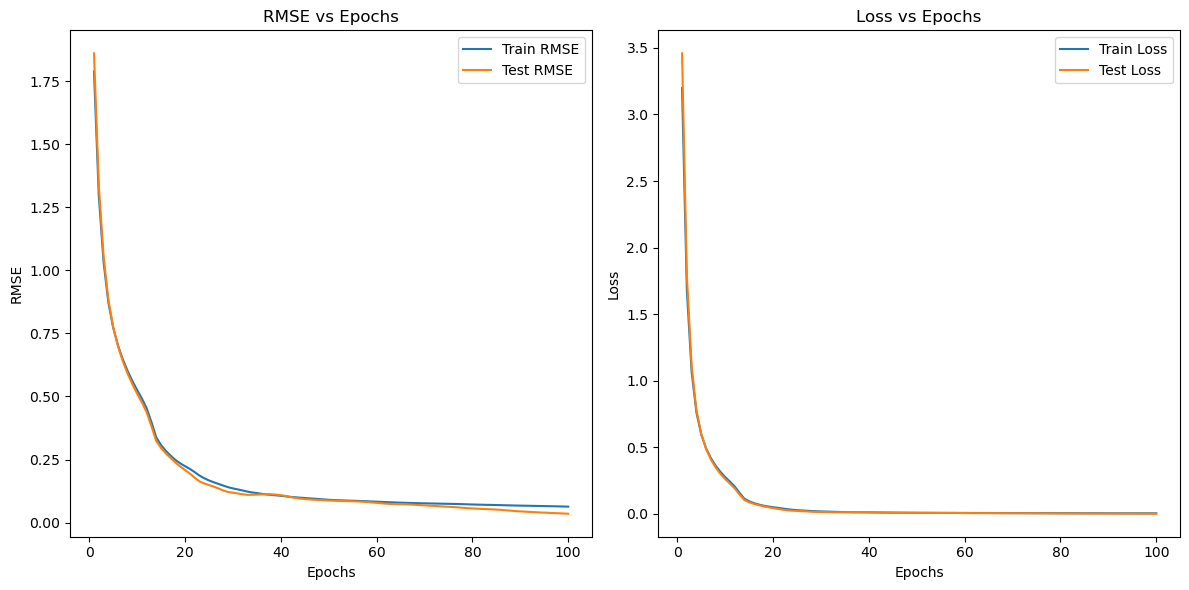

In [2]:
from kan import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import tqdm as tqdm   

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def load_rrr():
    data = pd.read_csv('RRR_data2.csv')
    
    X = data[['px', 'py', 'pz']]
    y = data[['theta_1', 'theta_2', 'theta_3']]
   
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = scaler.fit_transform(y)
    
    # Convert to tensors
    X = torch.tensor(X, dtype=torch.float32).to(device)
    y = torch.tensor(y, dtype=torch.float32).to(device)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    dataset = {}
    dataset['train_input'] = X_train
    dataset['test_input'] = X_test
    dataset['train_label'] = y_train
    dataset['test_label'] = y_test
    
    return dataset

dataset = load_rrr()

def rmse_loss(output, target):
    return torch.sqrt(torch.nn.functional.mse_loss(output, target))

def train_r2():
    with torch.no_grad():
        predictions = model(dataset['train_input'])
        r2 = 1 - torch.nn.functional.mse_loss(predictions, dataset['train_label']) / torch.nn.functional.mse_loss(dataset['train_label'], torch.zeros_like(dataset['train_label']))
    return r2

def test_r2():
    with torch.no_grad():
        predictions = model(dataset['test_input'])
        r2 = 1 - torch.nn.functional.mse_loss(predictions, dataset['test_label']) / torch.nn.functional.mse_loss(dataset['test_label'], torch.zeros_like(dataset['test_label']))
    return r2

model = KAN(width=[3, 64, 64, 3], grid=5, k=3, seed=0, device=device)

# Tracking losses and RMSE
train_losses = []
test_losses = []
train_rmses = []
test_rmses = []

optimizer = torch.optim.LBFGS(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Training loop
epochs = 100

for epoch in range(epochs):
    def closure():
        optimizer.zero_grad()
        predictions = model(dataset['train_input'])
        loss = loss_fn(predictions, dataset['train_label'])
        loss.backward()
        return loss
    
    optimizer.step(closure)
    
    with torch.no_grad():
        train_predictions = model(dataset['train_input'])
        test_predictions = model(dataset['test_input'])
        
        train_loss = loss_fn(train_predictions, dataset['train_label']).item()
        test_loss = loss_fn(test_predictions, dataset['test_label']).item()
        
        train_rmse = rmse_loss(train_predictions, dataset['train_label']).item()
        test_rmse = rmse_loss(test_predictions, dataset['test_label']).item()
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
    
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss}, Test Loss: {test_loss}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')

# Plotting
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

# RMSE vs Epochs
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_rmses, label='Train RMSE')
plt.plot(epochs_range, test_rmses, label='Test RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs Epochs')
plt.legend()

# Loss vs Epochs
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
# getting the rmse and r2 score
rmse = rmse_loss(test_predictions, dataset['test_label']).item()
r2 = test_r2().item()

print(f'RMSE: {rmse}')
print(f'R2: {r2}')


RMSE: 0.035201702266931534
R2: 0.9987787008285522


# depth 3, each 128 neuron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from kan import KAN

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

def load_rrr():
    data = pd.read_csv('RRR_data2.csv')
    
    X = data[['px', 'py', 'pz']]
    y = data[['theta_1', 'theta_2', 'theta_3']]
   
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = scaler.fit_transform(y)
    
    # Convert to tensors
    X = torch.tensor(X, dtype=torch.float32).to(device)
    y = torch.tensor(y, dtype=torch.float32).to(device)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    dataset = {}
    dataset['train_input'] = X_train
    dataset['test_input'] = X_test
    dataset['train_label'] = y_train
    dataset['test_label'] = y_test
    
    return dataset

dataset = load_rrr()

def rmse_loss(output, target):
    return torch.sqrt(torch.nn.functional.mse_loss(output, target))

def train_r2():
    with torch.no_grad():
        predictions = model(dataset['train_input'])
        r2 = 1 - torch.nn.functional.mse_loss(predictions, dataset['train_label']) / torch.nn.functional.mse_loss(dataset['train_label'], torch.zeros_like(dataset['train_label']))
    return r2

def test_r2():
    with torch.no_grad():
        predictions = model(dataset['test_input'])
        r2 = 1 - torch.nn.functional.mse_loss(predictions, dataset['test_label']) / torch.nn.functional.mse_loss(dataset['test_label'], torch.zeros_like(dataset['test_label']))
    return r2

# Updated model architecture with 3 layers of 128 neurons each
model = KAN(width=[3, 128, 128, 128, 3], grid=5, k=3, seed=0, device=device)

# Tracking losses and RMSE
train_losses = []
test_losses = []
train_rmses = []
test_rmses = []

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Training loop
epochs = 100
batch_size = 32
n_samples = dataset['train_input'].shape[0]
n_batches = n_samples // batch_size

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(n_samples)
    
    for i in range(0, n_samples, batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = dataset['train_input'][indices], dataset['train_label'][indices]
        
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = loss_fn(predictions, batch_y)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        model.eval()
        train_predictions = model(dataset['train_input'])
        test_predictions = model(dataset['test_input'])
        
        train_loss = loss_fn(train_predictions, dataset['train_label']).item()
        test_loss = loss_fn(test_predictions, dataset['test_label']).item()
        
        train_rmse = rmse_loss(train_predictions, dataset['train_label']).item()
        test_rmse = rmse_loss(test_predictions, dataset['test_label']).item()
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
    
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss}, Test Loss: {test_loss}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')

# Plotting
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

# RMSE vs Epochs
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_rmses, label='Train RMSE')
plt.plot(epochs_range, test_rmses, label='Test RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs Epochs')
plt.legend()

# Loss vs Epochs
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Getting the RMSE and R2 score
rmse = rmse_loss(test_predictions, dataset['test_label']).item()
r2 = test_r2().item()

print(f'RMSE: {rmse}')
print(f'R2: {r2}')


TypeError: KAN.train() missing 1 required positional argument: 'dataset'